<a href="https://colab.research.google.com/github/mjmousavi97/Deep-Learning-Tehran-uni/blob/main/HomeWorks/01%20HW/image_classification_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Keras #1
Neural Networks & Deep Learning / Spring 2023, University of Tehran

**Author:** Mohammad Javad

Here's a checklist on data preprocessing for machine learning models:

- **Data cleaning:** Remove or correct any invalid, incomplete, duplicated, or irrelevant data points in the dataset. This step is important to ensure that the dataset is of high quality and that the machine learning model is not biased by poor-quality data.

- **Data normalization/standardization:** Scale the data to a common range or distribution, to ensure that features with different scales do not dominate the analysis. This step can also improve the convergence rate of some machine learning algorithms.

- **Data encoding:** Transform categorical data into numerical data, so that machine learning algorithms can process it. Common encoding methods include one-hot encoding and label encoding.

- **Feature engineering:** Create new features from existing ones or select a subset of relevant features. This step can improve the accuracy and speed of the machine learning model by reducing the dimensionality of the input data.

- **Handling missing values:** Determine the best strategy for handling missing data points, such as imputing the missing values with the mean, median, or mode of the data, or deleting the rows with missing values.

- **Data splitting:** Split the dataset into training, validation, and test sets, to evaluate the performance of the machine learning model on new, unseen data.

- **Data augmentation:** Generate new data points from existing ones, by applying transformations such as rotation, translation, or scaling. This step can increase the size of the dataset and improve the robustness of the machine learning model.

- **Data visualization:** Visualize the data to gain insights into the patterns and relationships in the data. This step can also help identify any outliers or anomalies in the data.

Each of these steps is important for data preprocessing, and they should be performed in a sequential and iterative manner, until the desired level of data quality and model performance is achieved.

## 2.1 MNIST dataset loading
Each MNIST data point consists of two components: a label and a picture of a handwritten digit. The labels will be "y" and the photos "x." Both the training set and the test set contain images and the labels that go with them; for instance, the training images are in the filename extension mnist.train.images and the training labels are in the filename extension mnist.train.labels.

In [1]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f'X_train`s shape is: {X_train.shape}')
print(f'y_train`s shape is: {y_train.shape}')
print(f'X_test`s shape is: {X_test.shape}')
print(f'y_test`s shape is: {y_test.shape}')

X_train`s shape is: (60000, 28, 28)
y_train`s shape is: (60000,)
X_test`s shape is: (10000, 28, 28)
y_test`s shape is: (10000,)


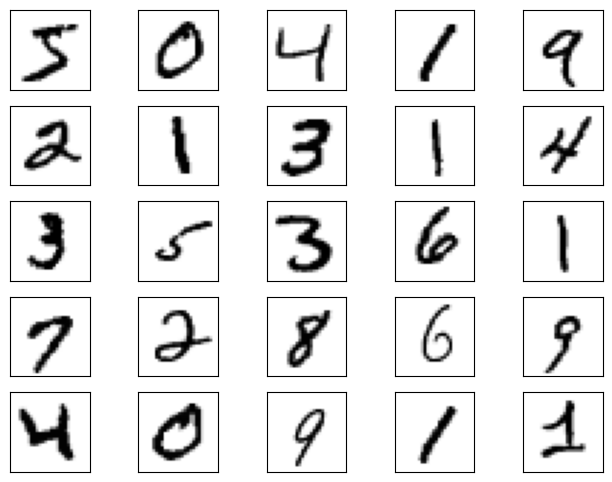

In [3]:
plt.figure(figsize=(8,6))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

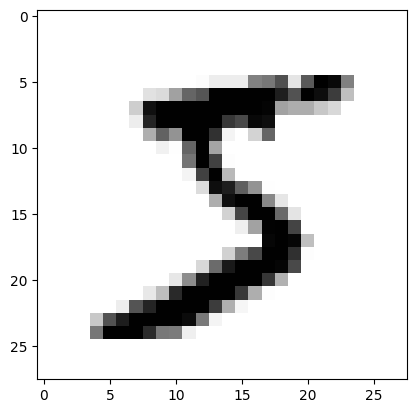

In [4]:
plt.imshow(X_train[0], cmap=plt.cm.binary)
print(X_train[0])

# Data reshaping

In [5]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print(f'X_test`s shape is: {X_train.shape}')
print(f'X_test`s shape is: {X_test.shape}')

X_test`s shape is: (60000, 784)
X_test`s shape is: (10000, 784)


## Data Normalization

- **Feature scaling/MinMax normalization:** This method scales the features of the input data to a fixed range, usually between 0 and 1, using the formula:


        `X_norm = (X - X_min) / (X_max - X_min)`


where X is the input data, X_min is the minimum value of X, and X_max is the maximum value of X. This method is useful when the input data has different scales and units, and it can improve the convergence of the neural network.

- **Standardization/Z-score normalization:** This method scales the features of the input data to have zero mean and unit variance using the formula:


        `X_norm = (X - X_mean) / X_std`

where X is the input data, X_mean is the mean of X, and X_std is the standard deviation of X. This method is useful when the input data has a Gaussian distribution, and it can improve the convergence of the neural network.

- **PCA-based normalization:** This method applies principal component analysis (PCA) to the input data and normalizes the resulting principal components to have unit variance. This method is useful when the input data has high dimensionality, and it can reduce the computational complexity of the neural network.


In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


In [7]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

## Label Encoding

- **Ordinal encoding:** This method assigns a unique integer value to each category in the categorical variable, based on the order of the categories. For example, if a categorical variable has the categories "low", "medium", and "high", the method assigns the values 1, 2, and 3, respectively. This method is suitable for ordinal categorical variables, where the order of the categories is meaningful.

- **One-hot encoding:** This method creates a binary feature for each category in the categorical variable, where the feature has a value of 1 if the category is present, and 0 otherwise. For example, if a categorical variable has the categories "red", "green", and "blue", the method creates three binary features, where the first feature has a value of 1 if the color is red, and 0 otherwise, and so on. This method is suitable for nominal categorical variables, where the order of the categories is not meaningful.

- **Count encoding:** This method assigns a unique integer value to each category in the categorical variable, based on the frequency of the category in the data. For example, if a categorical variable has the categories "red", "green", and "blue", and "red" appears 5 times, "green" appears 3 times, and "blue" appears 2 times, the method assigns the values 1, 2, and 3, respectively. This method is suitable for categorical variables where the frequency of the categories is informative.

- **Target encoding:** This method assigns a numerical value to each category in the categorical variable, based on the mean of the target variable for that category. For example, if a categorical variable has the categories "male" and "female", and the target variable is a binary variable indicating whether a person is a smoker or not, the method assigns the mean value of the target variable for each category, i.e., the proportion of smokers among males and females, respectively. This method is suitable for categorical variables where the target variable is informative.

In [8]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

___

# Building MLP Model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [12]:
output_dim = y_train[0].shape
input_dim = X_train[0].shape
print(f'output_dim: {output_dim}')
print(f'input_dim: {input_dim}')

batch_size = 128
n_epochs = 10

output_dim: (10,)
input_dim: (784,)


##  Softmax Classifier

In softmax classifier, the input is first passed through a linear transformation and then the output is transformed using the softmax function. The softmax function maps the output to a probability distribution over the categories, where the sum of probabilities across all categories is equal to 1. The category with the highest probability is then selected as the predicted output.

In [13]:
model = Sequential()
model.add(Dense(10, input_shape=input_dim)
model.add(Activation('softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epochs)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5447 - loss: 1.6425
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8325 - loss: 0.7615
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8554 - loss: 0.6079
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8642 - loss: 0.5404
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8735 - loss: 0.4961
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8801 - loss: 0.4653
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8848 - loss: 0.4460
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8847 - loss: 0.4322
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8859 - loss: 0.4214
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8901 - loss: 0.4050


In [23]:
 def plot_accuracy(histroy):
    # Plot the training accuracy
    lst = list(range(10))
    sns.set_style("darkgrid")
    plt.plot([x + 1 for x in lst], history.history['accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train'], loc='upper left')
    plt.show()

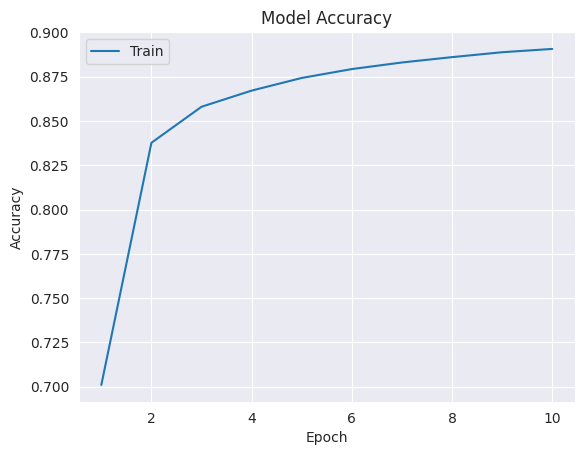

In [24]:
plot_accuracy(history)

In [25]:
def score_table(model):
    score = model.evaluate(X_test, y_test, verbose='0')
    df = pd.DataFrame({'Test Score': [score[0]], 'Test Accuracy': [score[1]]})
    print('\n\n', df, '\n\n')

In [26]:
score_table(model)



    Test Score  Test Accuracy
0    0.379432         0.8998 




The purpose of using **Activation Functions** in Keras is to allow the neural network to model complex relationships between the input and output variables. Without activation functions, the output of a neuron would be a linear combination of its inputs, which would limit the expressiveness of the neural network.

- **Sigmoid function:** It maps the input to a range between 0 and 1, and is commonly used in binary classification problems.

- **ReLU (Rectified Linear Unit) function:** It returns the input if it is positive, and 0 otherwise, and is commonly used in deep neural networks.

- **Tanh function:** It maps the input to a range between -1 and 1, and is commonly used in recurrent neural networks.

- **Softmax function:** It maps the input to a probability distribution over multiple categories, and is commonly used in classification problems with more than two categories.

**Optimizers** in Keras are algorithms that are used to optimize the weights of a neural network during training by adjusting them in the direction of minimizing the loss function. The loss function measures the difference between the predicted output and the true output, and the goal of the optimizer is to minimize this difference by finding the optimal values of the weights.

- **Stochastic Gradient Descent (SGD):** It is the most basic optimizer that updates the weights based on the gradient of the loss function with respect to the weights.

- **Adam:** It is a popular optimizer that uses a combination of adaptive learning rates and momentum to converge faster and more efficiently than SGD.

- **RMSprop:** It is another popular optimizer that uses a moving average of squared gradients to adapt the learning rate.

- **Adagrad:** It adapts the learning rate based on the frequency of the updates for each weight.